## Saynur Altın 

# Students Performance Predict With Clustering

   - Applied Machine Learning to predict performance student

### Import depedencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from functools import partial
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### Read dataset


In [ ]:
df= pd.read_csv("StudentsPerformance.csv")

In [ ]:
print(df.head(10))

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                  

In [ ]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Add column 'mean score'

In [ ]:
df['mean score'] = np.mean(np.array(df[["math score", "reading score", "writing score"]]), axis=1, dtype=np.int64)

In [ ]:
print(df.head(10))


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2               

# Pre-processing data
   - Change values to quantitative values

In [ ]:
def to_categorical(df, value):
    categories = list(pd.Categorical(df).categories)
    return categories.index(value) + 1
columns = ["lunch", "race/ethnicity", "gender", "parental level of education", "test preparation course"]
for name in columns:
    df[name] = df[name].apply(partial(to_categorical, df[name]))

### Split dataset into training set and test set
 - transmits properties and target data to the function and specifies a 20% test size 80% train size


In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(
    df.drop('mean score', axis=1).values,
    df['mean score'].values, test_size=0.2, random_state=42)


## I create a pipeline that will first cluster the training set into 3 clusters

In [ ]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=3)),
    ("model1", RandomForestClassifier(n_estimators=36, min_samples_leaf=2)),
])
#train the model by fitting it to the data with pipeline
pipeline.fit(X_train, y_train)
#print pipeline score
print(pipeline.score(X_test, y_test)*100)

76.0


## I chose the number of clusters k arbitrarily; I can surely do better.I can use GridSearchCV to find the optimal number of clusters

In [ ]:
param_grid = dict(kmeans__n_clusters=range(1, 4))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)
print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test)*100)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] kmeans__n_clusters=1 ............................................


c:\users\abc\pycharmprojects\untitled\venv\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=1, total=   2.0s
[CV] kmeans__n_clusters=1 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=1, total=   1.9s
[CV] kmeans__n_clusters=1 ............................................
[CV] ............................. kmeans__n_clusters=1, total=   1.7s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   7.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   8.5s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   6.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   8.6s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   8.5s
[CV] kmeans__n_clusters=3 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   51.3s finished


{'kmeans__n_clusters': 3}
77.0



## I create a pipeline that will first cluster the training set into 3 clusters

In [ ]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=3)),
    ("model2", SVC()),
])
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test)*100)

32.5


## I chose the number of clusters k arbitrarily; I can surely do better I can use GridSearchCV to find the optimal number of clusters

In [ ]:
param_grid = dict(kmeans__n_clusters=range(1, 4))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)
print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test)*100)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] kmeans__n_clusters=1 ............................................


c:\users\abc\pycharmprojects\untitled\venv\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=1, total=   1.9s
[CV] kmeans__n_clusters=1 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=1, total=   2.0s
[CV] kmeans__n_clusters=1 ............................................
[CV] ............................. kmeans__n_clusters=1, total=   1.8s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   9.0s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   8.0s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   7.7s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   7.8s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   8.8s
[CV] kmeans__n_clusters=3 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   56.5s finished


{'kmeans__n_clusters': 3}
32.5



## I create a pipeline that will first cluster the training set into 3 clusters

In [ ]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=3)),
    ("model3",  DecisionTreeClassifier()),
])
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test)*100)

75.5


## I chose the number of clusters k arbitrarily; I can surely do better.I can use GridSearchCV to find the optimal number of clusters

In [ ]:
param_grid = dict(kmeans__n_clusters=range(1, 4))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)
print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test)*100)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] kmeans__n_clusters=1 ............................................


c:\users\abc\pycharmprojects\untitled\venv\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=1, total=   2.2s
[CV] kmeans__n_clusters=1 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=1, total=   2.0s
[CV] kmeans__n_clusters=1 ............................................
[CV] ............................. kmeans__n_clusters=1, total=   2.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   7.3s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   9.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   6.4s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   7.4s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   8.4s
[CV] kmeans__n_clusters=3 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   51.2s finished


{'kmeans__n_clusters': 3}
77.0



## I create a pipeline that will first cluster the training set into 3 clusters

In [ ]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=3)),
    ("model4",  AdaBoostClassifier()),
])
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test)*100)

5.0


## I chose the number of clusters k arbitrarily; I can surely do better.I can use GridSearchCV to find the optimal number of clusters

In [ ]:
param_grid = dict(kmeans__n_clusters=range(1, 4))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)
print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test)*100)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] kmeans__n_clusters=1 ............................................


c:\users\abc\pycharmprojects\untitled\venv\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=1, total=   2.1s
[CV] kmeans__n_clusters=1 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=1, total=   2.0s
[CV] kmeans__n_clusters=1 ............................................
[CV] ............................. kmeans__n_clusters=1, total=   1.9s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   9.3s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   9.5s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   5.7s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   7.8s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   7.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   52.8s finished


{'kmeans__n_clusters': 2}
5.5



## Here I'll graph some of the variables to see what the data looks like

AxesSubplot(0.125,0.125;0.775x0.755)


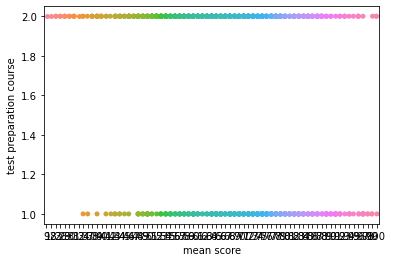

In [ ]:
print(sns.stripplot(x="mean score", y="test preparation course", data=df, jitter=True));


AxesSubplot(0.125,0.125;0.775x0.755)


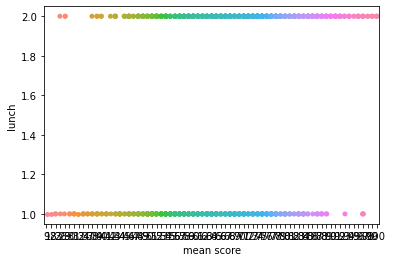

In [ ]:
print(sns.stripplot(x="mean score", y="lunch", data=df, jitter=True));

AxesSubplot(0.125,0.125;0.775x0.755)


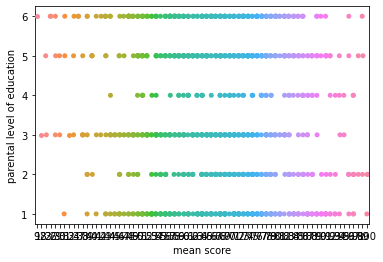

In [ ]:

print(sns.stripplot(x="mean score", y="parental level of education", data=df, jitter=True));

AxesSubplot(0.125,0.125;0.775x0.755)


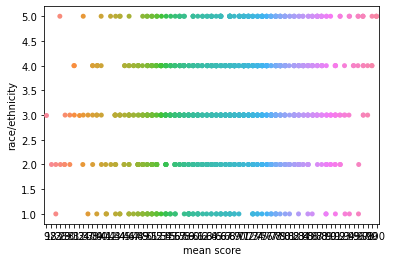

In [ ]:

print(sns.stripplot(x="mean score", y="race/ethnicity", data=df, jitter=True));

AxesSubplot(0.125,0.125;0.775x0.755)


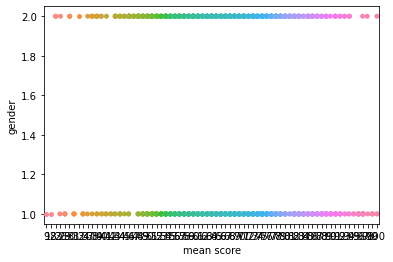

In [ ]:
print(sns.stripplot(x="mean score", y="gender", data=df, jitter=True));

AxesSubplot(0.125,0.125;0.775x0.755)


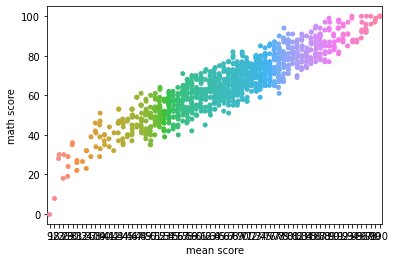

In [ ]:
print(sns.stripplot(x="mean score", y="math score", data=df, jitter=True));

AxesSubplot(0.125,0.125;0.775x0.755)


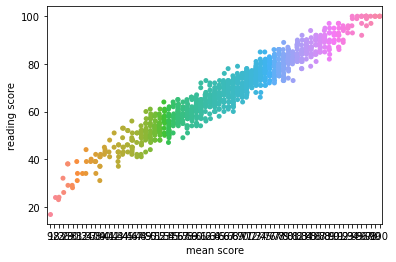

In [ ]:
print(sns.stripplot(x="mean score", y="reading score", data=df, jitter=True));

AxesSubplot(0.125,0.125;0.775x0.755)


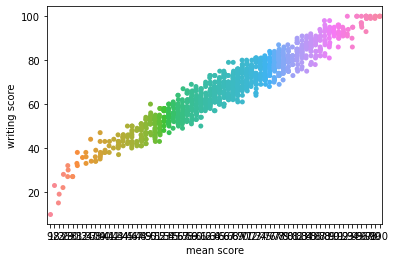

In [ ]:
print(sns.stripplot(x="mean score", y="writing score", data=df, jitter=True));


## Data Preparation
I'm going to want to convert some of the categorical variables to be dummy variables.

In [ ]:
df1 = pd.get_dummies(df['gender'])
df2 = pd.get_dummies(df['test preparation course'])
df3 = pd.get_dummies(df['mean score'])
df = pd.concat([df, df1, df2, df3], axis=1)
print(df.head())

   gender  race/ethnicity  parental level of education  lunch  \
0       1               2                            2      2   
1       1               3                            5      2   
2       1               2                            4      2   
3       2               1                            1      1   
4       2               3                            5      2   

   test preparation course  math score  reading score  writing score  \
0                        2          72             72             74   
1                        1          69             90             88   
2                        2          90             95             93   
3                        2          47             57             44   
4                        2          76             78             75   

   mean score  1  ...  91  92  93  94  95  96  97  98  99  100  
0          72  1  ...   0   0   0   0   0   0   0   0   0    0  
1          82  1  ...   0   0   0   0   0   0 

## Cluster Plotting
I have some Descriptive Graphs, I now want to plot some clusters to see what the data looks like.
ı used kmeans.  I've initialized the model so it starts off with three clusters and has a reproducible random state. From there, this model only works with numerical columns, so I throw those values into numericalColumns. From there, I run the model and put the result into labels.

In [ ]:
kmeans_model = KMeans(n_clusters=3, random_state=1)
# Get only the numeric columns
numericalColumns = df._get_numeric_data()
# Fit the model using the good columns
kmeans_model.fit(numericalColumns)
# Get the cluster assignments.
labels = kmeans_model.labels_


## Principle Component Analysis
I'm going to use Principle Component Analysis to compress the multiple dimensions

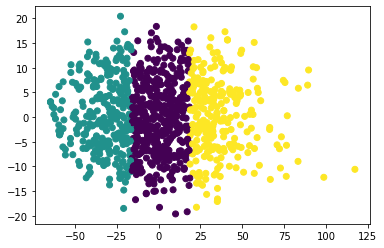

None


In [ ]:
# Create a PCA model.
pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
plot_columns = pca_2.fit_transform(numericalColumns)
# Make a scatter plot of each game, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
# Show the plot.
print(plt.show())

# Breaking the Data into a Training and Testing Section

In [ ]:
train = df.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = df.loc[~df.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(800, 86)
(200, 86)


# I note down my target column. Mean score is in the unwanted columns because I don't want to include it in my list of independent variables. I want to try and predict what Grade will be

In [ ]:
unwantedCols = ["gender", "race/ethnicity",'mean score', "parental level of education", "lunch", "test preparation course", "math score", "reading score", "writing score", "mean score"]
columns = df.columns.tolist()
columns = [c for c in columns if c not in unwantedCols]
target = "mean score"


I'm going to initialize my model, fit it to my columns and training target, make my predictions and see how well I did.

In [ ]:
model1 = RandomForestClassifier(n_estimators=36, min_samples_leaf=2)
#train the model by fitting it to the data

model1.fit(train[columns], train[target])
# Make predictions.
predictions = model1.predict(test[columns])

print('accuracy:', accuracy_score(predictions, test[target])*100)


accuracy: 96.5


In [ ]:
model2 = SVC()
#train the model by fitting it to the data
model2.fit(train[columns], train[target])
# Make predictions.
predictions = model2.predict(test[columns])

print('accuracy:', accuracy_score(predictions, test[target])*100)


accuracy: 93.0


In [ ]:
model3 = DecisionTreeClassifier()
#train the model by fitting it to the data
model3.fit(train[columns], train[target])
# Make predictions.
predictions = model3.predict(test[columns])

print('accuracy:', accuracy_score(predictions, test[target])*100)


accuracy: 99.0
